In [12]:
# Stock price source - yahoo finance 
#Import dependencies
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [13]:
#Read stock price csv files 
zoom = pd.read_csv("zoom.csv")
slack = pd.read_csv("slack.csv")
shopify = pd.read_csv("shopify.csv")
cisco = pd.read_csv("cisco.csv")
shopify["Date"]=pd.to_datetime(shopify["Date"])
shopify["Date"]=shopify["Date"].dt.strftime("%Y-%m-%d")

shopify.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-10-31,316.410004,319.850006,308.739990,313.570007,313.570007,1789400
1,2019-11-01,316.250000,322.079987,312.869995,316.760010,316.760010,1600500
2,2019-11-04,318.380005,321.000000,303.769989,307.910004,307.910004,2622600
3,2019-11-05,308.089996,309.049988,294.462006,295.500000,295.500000,2806000
4,2019-11-06,296.920013,300.700012,291.510010,295.019989,295.019989,1635900


In [14]:
#Remove other columns in the df, only keep data and closing price

zoom=zoom[["Date","Close"]]
slack=slack[["Date","Close"]]
cisco=cisco[["Date","Close"]]
shopify=shopify[["Date","Close"]]
cisco.head()

,Date,Close
0,2019-10-31,47.509998
1,2019-11-01,47.029999
2,2019-11-04,47.480000
3,2019-11-05,47.759998
4,2019-11-06,48.270000


In [15]:
#Merge different stock price dataframe into a combined dataframe
combined_df = pd.merge(zoom, slack, how='outer', on="Date", suffixes=["_Zoom", "_Slack"])
combined_df = pd.merge(combined_df, cisco, how='outer', on="Date", suffixes=["_Slack","_Cisco"])
combined_df = pd.merge(combined_df, shopify, how='outer', on="Date",  suffixes=["_Cisco", "_Shopify"])

#chnage the names for columns
combined_df = combined_df.rename(columns = {"Close_Zoom":"Zoom","Close_Slack":"Slack","Close_Cisco":"Cisco","Close_Shopify":"Shopify"})
combined_df[["Zoom","Slack","Cisco","Shopify"]]=combined_df[["Zoom","Slack","Cisco","Shopify"]].round(2)
combined_df.head()


,Date,Zoom,Slack,Cisco,Shopify
0,2019-10-31,69.89,22.00,47.51,313.57
1,2019-11-01,70.39,21.94,47.03,316.76
2,2019-11-04,70.12,21.94,47.48,307.91
3,2019-11-05,66.89,20.75,47.76,295.50
4,2019-11-06,66.83,20.14,48.27,295.02


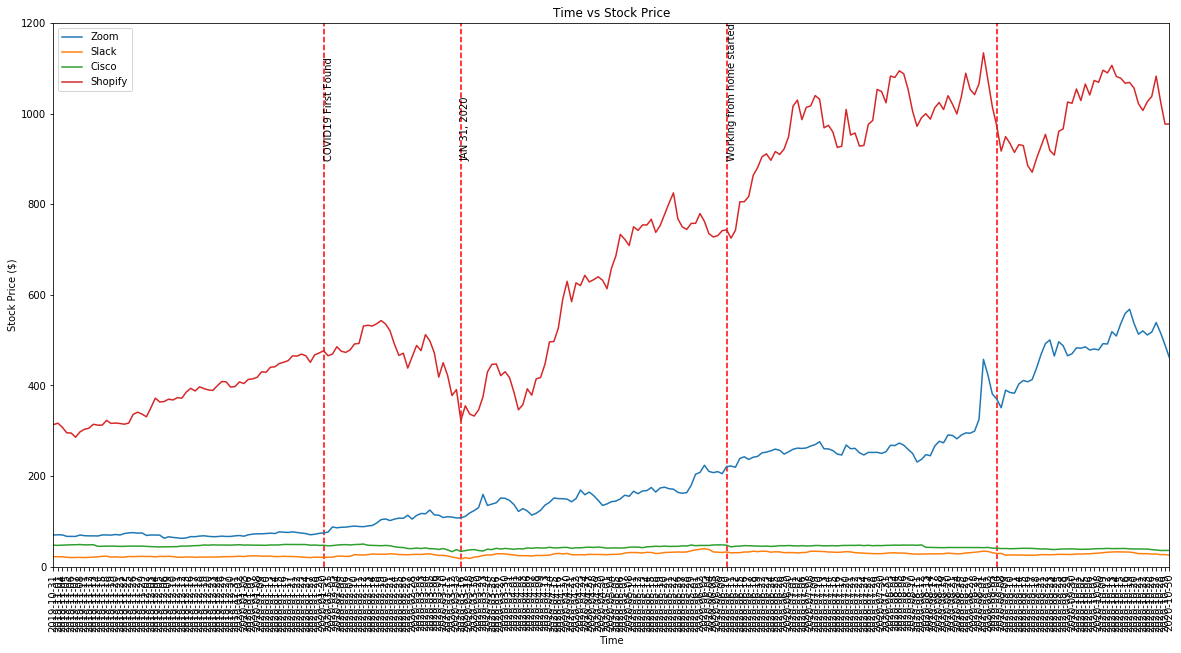

In [19]:
# Create a graph to show relationship 
graph = combined_df.plot(kind="line",figsize=(20,10))
plt.title("Time vs Stock Price")
plt.xlabel("Time")
plt.ylabel("Stock Price ($)")
plt.ylim(0,1200)

main_point = [61,92,152,213,274,366]
labels = ["12/31/19","1/31/20","3/31/20","5/31/20","7/31/20"]
plt.xticks(np.arange(253), combined_df["Date"],rotation=90)
plt.vlines(main_point, 0, 1200, colors='r', linestyles='dashed', label=labels, data=None)
plt.text(61,900,'COVID19 First Found',rotation=90)
plt.text(92,900,'JAN 31, 2020',rotation=90)
plt.text(152,900,'Working from home started',rotation=90)
plt.savefig("../Output/Tech Stock Impact_Price.png")
plt.show()


#format the Axis to provide more information
#add vertical timelines into the graph to separate the stage

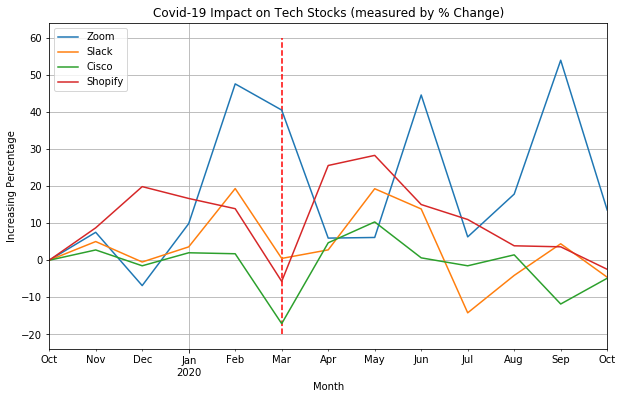

In [9]:
combined_df['Date_dt']=pd.to_datetime(combined_df['Date'],format = "%Y-%m-%d")
combined_df['month_year'] = combined_df['Date_dt'].dt.to_period('M')
#_change = combined_df.loc[combined_df['Date'].isin(["2019-10-31","2019-12-31"])]

combined_df.sort_values("Date_dt",inplace=True)
combined_df['Last Day'] = combined_df.groupby('month_year')['Date_dt'].rank(method='first')
new_df = combined_df.groupby('month_year').max().reset_index()
new_df = new_df[["month_year","Zoom","Slack","Cisco","Shopify"]]
new_df = new_df.rename(columns={"month_year":"Month End"})
new_df.set_index('Month End', inplace=True)
pct_df = new_df.pct_change()*100
pct_df = pct_df.fillna(0)
pct_df.plot(kind="line",figsize=(10,6))
plt.xlabel("Month")
plt.ylabel("Increasing Percentage")
plt.grid()
#plt.hlines(0, "2019-10","2020-10", colors='r', linestyles='solid', label, data=None)
plt.vlines("2020-03", -20, 60, colors='r', linestyles='dashed', label="COVID Announcement", data=None)
plt.title("Covid-19 Impact on Tech Stocks (measured by % Change)")
plt.savefig("../Output/Tech Stock Impact_Percent Change.png")

In [10]:
pct_df

,Zoom,Slack,Cisco,Shopify
Month End,,,,
2019-10,0.000000,0.000000,0.000000,0.000000
2019-11,7.540421,5.045455,2.778362,8.747648
2019-12,-6.838744,-0.475984,-1.494983,19.868035
2020-01,9.882891,3.608696,2.016632,16.667890
2020-02,47.582532,19.345363,1.752598,13.909160
2020-03,40.519595,0.492264,-17.103946,-5.703135
2020-04,5.972675,2.799160,4.711283,25.566640
2020-05,6.144657,19.298843,10.336871,28.293350
2020-06,44.589926,13.837375,0.648264,15.030842


In [ ]:
#import the total confirmed cases info of the country as well
#compare the stock trends and give obeservations